Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
[ 5.00000000e+00 -3.00614234e-15 -4.50000000e+00 -1.50000000e+00]


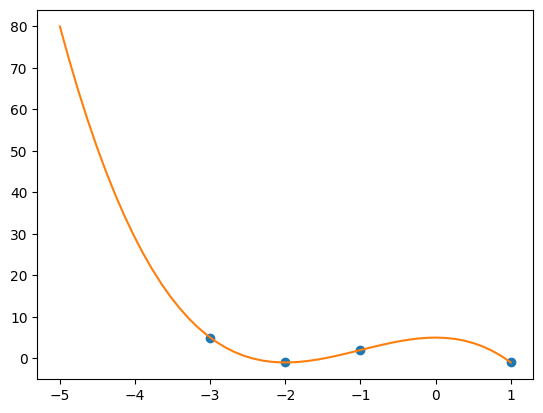

In [7]:
%pip install numpy matplotlib
import numpy as np
import matplotlib.pyplot as plt

def plot_difference_of_squares(x, y, grade):
    """
    Esta función ajusta un polinomio de grado 'grade' a los datos (x, y)
    utilizando el método de mínimos cuadrados y luego grafica los resultados.

    Parámetros:
    x : numpy.ndarray
        Array de valores x.
    y : numpy.ndarray
        Array de valores y correspondientes a x.
    grade : int
        Grado del polinomio a ajustar.

    Salida:
    Gráfico que muestra los datos originales y el polinomio ajustado.
    """
    Ax = np.array([(x)**i for i in range(grade + 1)])
    Am = np.dot(Ax, np.transpose(Ax))
    Aom = np.dot(y ,np.transpose(Ax))
    cG = np.linalg.solve(Am, Aom)
    print(cG)
    plt.plot(x, y, 'o')
    x0 = np.linspace(x[0] - 4, x[len(x)-1])
    plt.plot(x0, sum(cG[i] * x0**i for i in range(len(cG))))
    plt.show()

def main():
    """
    Función principal que define los datos y llama a plot_difference_of_squares
    para realizar el ajuste y la gráfica.
    """
    x = np.array([-1, -2, -3, 1])
    y = np.array([2,-1,5,-1])
    plot_difference_of_squares(x, y, 3)
if __name__ == '__main__':
    main()


A = 4.002260971089332e-21, k = 0.02705515355063069
Predicción para 1960: 428.66402370237535 millones
Predicción para 2000: 1265.0660238787093 millones


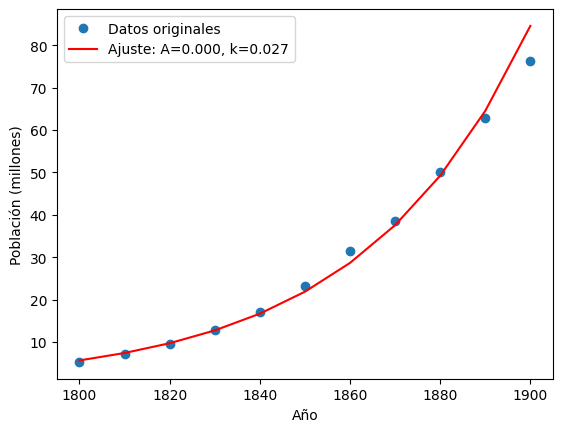

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def plot_exponential_fit(x, y):
    """
    Esta función ajusta un modelo exponencial a los datos (x, y)
    y luego grafica los resultados.

    Parámetros:
    x : numpy.ndarray
        Array de valores x.
    y : numpy.ndarray
        Array de valores y correspondientes a x.

    Salida:
    Gráfico que muestra los datos originales y el ajuste exponencial.
    """
    ln_y = np.log(y)
    A = np.vstack([x, np.ones(len(x))]).T
    k, ln_A = np.linalg.lstsq(A, ln_y, rcond=None)[0]
    A = np.exp(ln_A)
    
    print(f"A = {A}, k = {k}")
    
    # Predicciones
    x_pred = np.array([1960, 2000])
    y_pred = A * np.exp(k * x_pred)
    print(f"Predicción para 1960: {y_pred[0]} millones")
    print(f"Predicción para 2000: {y_pred[1]} millones")
    
    plt.plot(x, y, 'o', label='Datos originales')
    plt.plot(x, A * np.exp(k * x), 'r', label='Ajuste: A=%5.3f, k=%5.3f' % (A, k))
    plt.xlabel('Año')
    plt.ylabel('Población (millones)')
    plt.legend()
    plt.show()

def main():
    """
    Función principal que define los datos y llama a plot_exponential_fit
    para realizar el ajuste y la gráfica.
    """
    x = np.array([1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900])
    y = np.array([5.3, 7.2, 9.6, 12.9, 17.1, 23.1, 31.4, 38.6, 50.2, 62.9, 76.2])
    plot_exponential_fit(x, y)

if __name__ == '__main__':
    main()


# Aproximación de Cuadrados Mínimos mediante Álgebra Lineal

Este notebook demuestra cómo ajustar un polinomio a un conjunto de datos utilizando el método de mínimos cuadrados y álgebra lineal.

## Importar Bibliotecas

```python
import numpy as np
import matplotlib.pyplot as plt
```

## Fundamento Matemático

La idea detrás del método de mínimos cuadrados es encontrar los coeficientes
$( c_0, c_1, ..., c_n )$ que minimizan la suma de los cuadrados de las diferencias entre los valores observados $( y )$ y los valores predichos por el polinomio.

$$
S = \sum_{i=1}^{m} (y_i - P(x_i))^2
$$


Donde $( P(x) )$ es un polinomio de grado $( n )$ definido como:

$$
P(x) = c_0 + c_1 x + c_2 x^2 + ... + c_n x^n
$$



Utilizamos álgebra lineal para resolver este problema como un sistema de ecuaciones lineales de la forma $( A^T A c = A^T y )$, donde $( A )$ es la matriz de diseño y $( c )$ es el vector de coeficientes.

## Definir la Función de Ajuste

La función `plot_difference_of_squares` toma un conjunto de datos `x, y` y un grado `grade` para el polinomio. Luego ajusta un polinomio de ese grado a los datos y grafica tanto los datos como el polinomio ajustado.

```python
def plot_difference_of_squares(x, y, grade):
    """
    Esta función ajusta un polinomio de grado 'grade' a los datos (x, y)
    utilizando el método de mínimos cuadrados y luego grafica los resultados.
    """
    # ... (código)
```

## Función Principal

La función `main` define los datos `x` y `y` y llama a `plot_difference_of_squares`.

```python
def main():
    """
    Función principal que define los datos y llama a plot_difference_of_squares
    para realizar el ajuste y la gráfica.
    """
    # ... (código)
```

## Ejecución

Para ejecutar todo el código, simplemente corremos la función `main`.

```python
if __name__ == '__main__':
    main()
```
